# Absolute stability for time-integration schemes

Jupyter notebook to compute the region of absolute stability for various time-integration schemes.

Philipp Schlatter, January 2022

---

In [1]:
%matplotlib notebook 
# possible options: notebook, inline or widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation
import math 
params = {'legend.fontsize': 12,
          'legend.loc':'best',
          'figure.figsize': (8,5),
          'lines.markerfacecolor':'none',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize':12,
          'ytick.labelsize':12,
          'grid.alpha':0.6}
pylab.rcParams.update(params)

## Characteristic polynomial

Consider the differential equation $y' = \lambda y$. The amplification factor $G(z)$ is obtained as $G(z) = y^{n+1} / y^{n}$. The neutral curve is defined as the locus with $|G(z)| = 1$, which can be simply achieved by plotting contours of $|G(z)|$ at level 1.

### Single-step schemes

Runge-Kutta (RK) scheme of order $N$:
$$G(z) = \xi(z) = \sum_{k=0}^N \frac{z^k}{k!}$$

with $z=\lambda \Delta t$. 
For instance, the RK1 scheme corresponds to the Euler forward scheme, and has the characteristic polynomial $\xi(z)=1+z$.



<IPython.core.display.Javascript object>


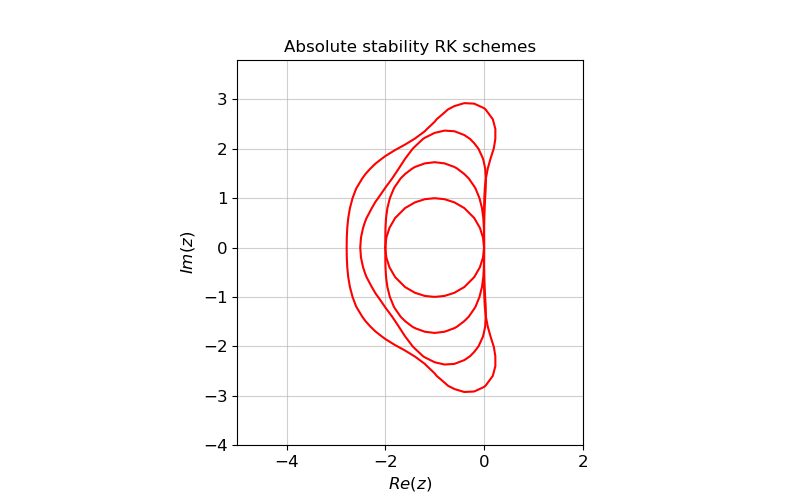

In [2]:
plt.figure()
plt.subplot(111,aspect='equal')

X,Y = np.meshgrid(np.arange(-5,2.1,.2),np.arange(-4,4,.2))
Z = X +1j*Y;
 
for N in range(1,4+1):
    G = np.real(Z*0)
    for k in range(0,N+1):
        rksum = 1/math.factorial(k)
        G = G + rksum*Z**k

    plt.contour(X,Y,np.abs(G),colors='r',levels=[1])

plt.title('Absolute stability RK schemes')
plt.xlabel(r'$Re(z)$')
plt.ylabel(r'$Im(z)$')
plt.grid()
plt.show()

### Multistep schemes

The Adams-Bashforth third-order scheme (AB3) is a multi-step scheme, which leads to a characteristic polynomial nonlinear  in $\xi$:

$$\xi^3 + (-1 - \frac{23}{12}z)\xi^2 + (\frac{16}{12}z)\xi - \frac{5}{12} z = 0$$

Therefore, we first need to compute the roots of this polynomial, take the maximum, and then plot the contours. Again, the AB1 scheme is equivalent to the Euler forward scheme with $\xi = 1+z$.

<IPython.core.display.Javascript object>


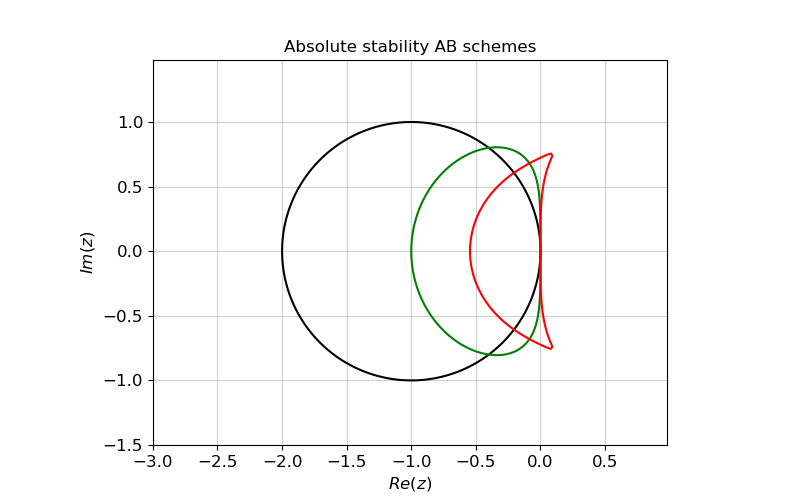

In [3]:
plt.figure()
plt.subplot(111,aspect='equal')

X,Y = np.meshgrid(np.arange(-3,1,.02),np.arange(-1.5,1.5,.02))
Z = X +1j*Y;

Gabs1 = np.real(Z*0)
Gabs2 = np.real(Z*0)
Gabs3 = np.real(Z*0)
for ii in range(Z.shape[0]):
    for jj in range(Z.shape[1]):
        a = np.roots([1,-1-Z[ii,jj]])
        Gabs1[ii,jj] = np.max(np.abs(a))
        a = np.roots([1,-1-3/2*Z[ii,jj],1/2*Z[ii,jj]])
        Gabs2[ii,jj] = np.max(np.abs(a))
        a = np.roots([1,-1-23/12*Z[ii,jj],16/12*Z[ii,jj],-5/12*Z[ii,jj]])
        Gabs3[ii,jj] = np.max(np.abs(a))
        
plt.contour(X,Y,Gabs1,colors='k',levels=[1])
plt.contour(X,Y,Gabs2,colors='g',levels=[1])
plt.contour(X,Y,Gabs3,colors='r',levels=[1])

plt.title('Absolute stability AB schemes')
plt.xlabel(r'$Re(z)$')
plt.ylabel(r'$Im(z)$')
plt.grid()
plt.show()

### Computing an explicit curve

The proper way of calculating the region of absolute stability is to follow the various curves. This is done by 

<IPython.core.display.Javascript object>


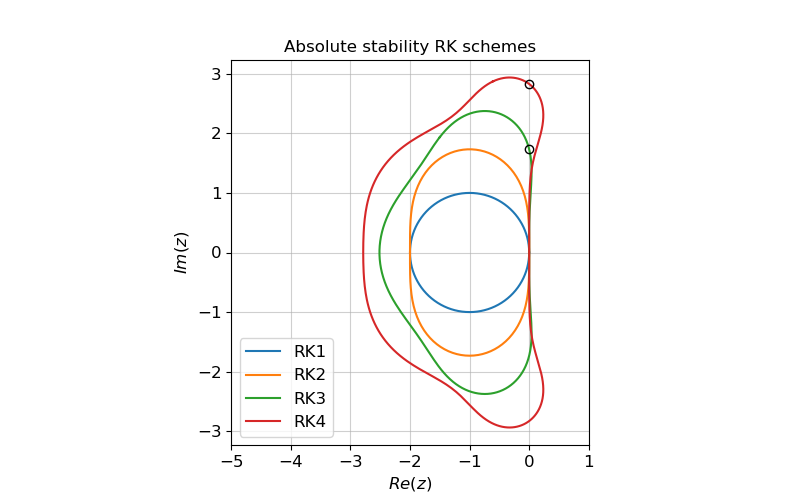

In [4]:
plt.figure()
plt.subplot(111,aspect='equal')

# discretised unit circle
n=100
phi = np.exp(1j*np.linspace(0,2*math.pi,n,endpoint=False))

for N in range(1,4+1):
    # compute coefficients of the characteristic polynomial
    rksum = 1
    for k in range(2,N+1):
        rksum = np.append(1/math.factorial(k), rksum)
    # compute the various positions that map to the unit circle
    p0 = []
    for i in range(phi.size):
        a = np.roots(np.append(rksum, 1-phi[i]))
        p0 = np.append(p0, a)
    # re-order the curve to get a consecutive line    
    for i in range(1,p0.size-1):
        ii = np.argsort( np.abs( p0[i:p0.size]-p0[i-1] ) )+i
        tmp = p0[i]; p0[i] = p0[ii[0]]; p0[ii[0]] = tmp
    # close the curve
    p0 = np.append(p0,p0[0])
    # plot the region of absolute stability
    plt.plot(np.real(p0),np.imag(p0),label="RK%s" % N)

plt.xlim([-5, 1])
plt.title('Absolute stability RK schemes')
plt.xlabel(r'$Re(z)$')
plt.ylabel(r'$Im(z)$')
plt.grid()
plt.legend(loc='lower left')
plt.plot(0,np.sqrt(3),'ko')
plt.plot(0,np.sqrt(8),'ko')
plt.show()
#plt.savefig('rk.pdf')  

The neutral curve crosses the imaginary axis at $\pm \sqrt{3}$ for the RK3 scheme, and at $\pm \sqrt{8}$ for the RK4 scheme. The RK1 (explicit Euler) and RK2 schemes do not cross the imaginary axis.